In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import general_functions as gf

pd.set_option("display.max_rows", 100)

In [2]:
drag_data_0 = pd.read_csv("drag_race_data_0.csv")

drag_data_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10200 entries, 0 to 10199
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   #            10200 non-null  int64  
 1   Year         10200 non-null  int64  
 2   ET           10200 non-null  float64
 3   MPH          10200 non-null  float64
 4   Last         10183 non-null  object 
 5   First        10167 non-null  object 
 6   Entry        10093 non-null  object 
 7   State        9571 non-null   object 
 8   Engine       9991 non-null   object 
 9   Make         80 non-null     object 
 10  Model        10139 non-null  object 
 11  Chassis      6385 non-null   object 
 12  Class        10170 non-null  object 
 13  Unnamed: 13  10200 non-null  object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.1+ MB


In [3]:
drag_data_0.drop("Make", axis = 1, inplace = True)
drag_data_0.drop("Chassis", axis = 1, inplace = True)
drag_data_0.drop("Unnamed: 13", axis = 1, inplace = True)


drag_data_0.head(5)

,#,Year,ET,MPH,Last,First,Entry,State,Engine,Model,Class
0,1,1962,0.00,0.0,NaN,NaN,Sidewinder Plus One,California,NaN,Dragster,AA/FD
1,2,1963,0.00,0.0,NaN,NaN,Sidewinder Plus One,California,NaN,Dragster,AA/FD
2,3,1966,8.32,0.0,NaN,NaN,Coburn Glaze Spl. & Boyd,California,Chrysler Hemi,Topolino,AA/FC
3,4,1967,0.00,0.0,NaN,NaN,Creasy Bros.,Illinois,Chrysler Hemi,Dragster,AA/FD
4,5,1968,8.09,180.0,NaN,NaN,"Muse, Oaks & Crafton",California,Chrysler Hemi,Dragster,AA/FD


In [4]:
drag_data_0[drag_data_0["MPH"] > 0]["MPH"].count()

5666

In [5]:
drag_data_0[drag_data_0["Engine"] != "NaN"]["Engine"].count()

9991

In [6]:
drag_data_0["Model"].value_counts()

Model
Dragster                    10106
27 Ford Model T Altered        11
Model T Dragster                5
Model T Roadster                4
23 Ford Model T Dragster        3
Dragster Coupe                  2
23 Ford Model T Altered         2
Topolino                        1
23 Ford Model T Roadster        1
27 Ford Model A Roadster        1
Belly Tank Lakester             1
Topolino Dragster               1
Lakester                        1
Name: count, dtype: int64

In [7]:
drag_data_0[drag_data_0["MPH"] > 0]["Engine"].value_counts()

Engine
Chrysler Hemi               2138
Keith Black Hemi            1457
TFX Hemi                     670
Chevrolet                    275
Donovan Hemi                 244
JP-1 Hemi                    203
Milodon Hemi                  75
Rodeck Chevrolet              40
BAE Hemi                      35
BAE Keith Black Hemi          35
Ford SOHC                     35
McGee                         26
1958 Chrysler Hemi            22
Oldsmobile                    21
Ed Pink Hemi                  20
Sainty                        19
Dodge                         16
Arias Chevrolet               16
1957 Chrysler Hemi            15
Pontiac                       15
Ford                          14
TFX                           14
WRE Hemi                      14
Chevrolet ZL1                 10
Mercury Flathead              10
KB Iron Hemi                  10
Chevrolet (twins)             10
Chrysler Hemi (twins)         10
Chrysler                       9
Veney Hemi                     7
Dod

In [8]:
drag_data_0["Class"].value_counts()

Class
AA/FD             5447
TF                4014
Top Fuel           189
A/FD               164
B/FD               152
Top Eliminator      64
C/FD                55
BB/FD               13
A/D                 11
T/F                  9
AA/FM                7
Jr. Fuel             6
AA/FC                5
D/FD                 4
AA/MR                4
AA/AD                3
AA/D                 3
A/FR                 2
AA/FFHD              2
CC/FD                2
A/C                  2
AA/FA                2
C/MFR                1
Exhibition           1
AA/FR                1
Injected Gas         1
A/FC                 1
A/MFR                1
Top Gas              1
A/MC                 1
A/R                  1
Four Barrel          1
Name: count, dtype: int64

In [9]:
drag_data_1 = drag_data_0[drag_data_0["MPH"] > 0]

drag_data_1.sort_values("Year", ascending = False)

,#,Year,ET,MPH,Last,First,Entry,State,Engine,Model,Class
5648,5649,2018,4.805,325.00,Massey,Spencer,Commerical Metal Fab,Texas,TFX Hemi,Dragster,TF
4946,4947,2017,4.485,338.35,Lagana,Dom,Nitro Ninja,New York,Keith Black Hemi,Dragster,TF
3709,3710,2017,4.443,335.32,Harris,Damien,Rapisarda International Autosports,Western Australia,BAE Hemi,Dragster,TF
5006,5007,2015,4.723,314.68,Lamattina,John,Fuchs Oils/Lamattina Bros.,Victoria,TFX Hemi,Dragster,TF
3708,3709,2015,4.701,314.68,Harris,Damien,Rapisarda International Autosports,Western Australia,BAE Hemi,Dragster,TF
...,...,...,...,...,...,...,...,...,...,...,...
319,320,1953,11.600,142.82,Arnett,Joaquin,Bean Bandits,California,Chrysler Hemi,Model T Roadster,Top Eliminator
318,319,1952,0.000,134.32,Arnett,Joaquin,Bean Bandits,California,Ford Flathead (twins),Model T Roadster,A/D
6442,6443,1950,0.000,120.00,Nicholson,Don,Nicholson Bros.,California,NaN,Dragster,Top Eliminator
9633,9634,1950,0.000,120.96,Ward,Bob,Evans Special,California,Mercury Flathead,Lakester,Top Eliminator


In [10]:
drag_data_1["Year"].value_counts()

Year
1965    471
1966    270
1969    220
1970    199
1972    194
1967    189
1968    182
1973    181
1971    179
1975    163
1974    156
1976    143
1964    130
1978    114
1977    110
1979     97
2005     94
1986     92
1980     91
2004     88
1993     85
1981     84
2006     83
1983     83
2000     79
2002     77
1995     76
2001     75
1985     75
1989     75
2008     74
2003     74
1997     74
1999     73
1994     73
1982     72
1987     71
2007     71
1963     71
1996     71
1990     71
1992     69
1988     64
1998     64
1984     61
1991     61
1962     49
2009     39
1959     34
2011     33
1960     31
1961     30
2010     24
2012     21
1958     21
1957     20
2013     19
2014     19
1956     18
2015     15
1955     12
1954      3
1950      3
1953      2
2017      2
1952      1
2018      1
Name: count, dtype: int64

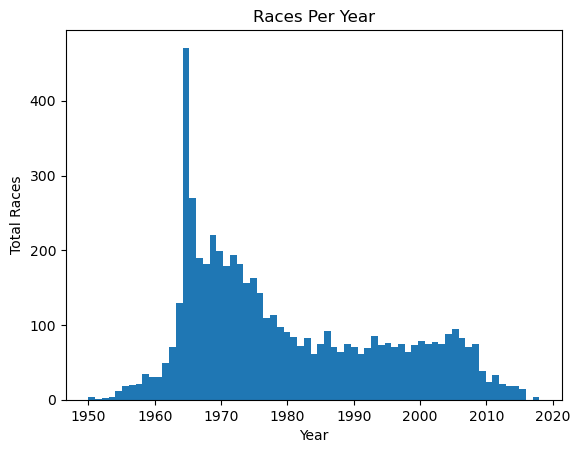

In [11]:
gf.create_histogram(drag_data_1["Year"], xlab = "Year", ylab = "Total Races", title = "Races Per Year", bin_count = drag_data_1["Year"].nunique())

In [12]:
drag_data_1["Engine"].nunique()

79

In [13]:
drag_data_1["Engine"].value_counts()

Engine
Chrysler Hemi               2138
Keith Black Hemi            1457
TFX Hemi                     670
Chevrolet                    275
Donovan Hemi                 244
JP-1 Hemi                    203
Milodon Hemi                  75
Rodeck Chevrolet              40
BAE Hemi                      35
BAE Keith Black Hemi          35
Ford SOHC                     35
McGee                         26
1958 Chrysler Hemi            22
Oldsmobile                    21
Ed Pink Hemi                  20
Sainty                        19
Dodge                         16
Arias Chevrolet               16
1957 Chrysler Hemi            15
Pontiac                       15
Ford                          14
TFX                           14
WRE Hemi                      14
Chevrolet ZL1                 10
Mercury Flathead              10
KB Iron Hemi                  10
Chevrolet (twins)             10
Chrysler Hemi (twins)         10
Chrysler                       9
Veney Hemi                     7
Dod

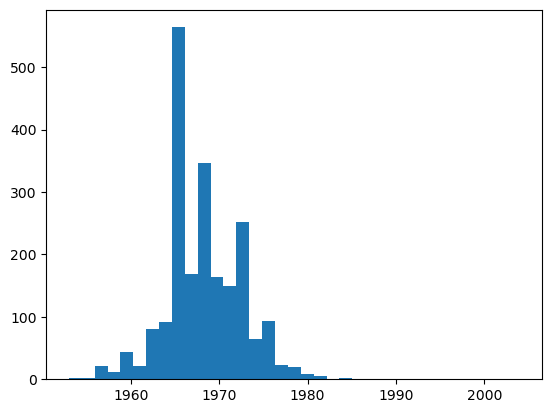

In [14]:
gf.create_histogram(drag_data_1[drag_data_1["Engine"] == "Chrysler Hemi"]["Year"], bin_count = drag_data_1[drag_data_1["Engine"] == "Chrysler Hemi"]["Year"].nunique())